# Recomanador Simple

## 1. INFORMACIÓ 

### 1.1. Abans de començar...

**\+ Durant la pràctica, solament es podran fer servir les següents llibreries**:

`Pandas, Numpy, Itertools`

*Nota: A més de les que ja es troben presents en la 1a cel·la i funcions natives de Python*

**\+ No es poden modificar les definicions de les funcions donades, ni canviar els noms de les variables i paràmetres ja donats**

Això no implica però que els hàgiu de fer servir. És a dir, que la funció tingui un paràmetre anomenat `df` no implica que l'hàgiu de fer servir, si no ho trobeu convenient.

**\+ En les funcions, s'especifica que serà i de quin tipus cada un dels paràmetres, cal respectar-ho**

Per exemple (ho posarà en el pydoc de la funció), `df` sempre serà indicatiu del `Pandas.DataFrame` de les dades. Durant la correcció, els paràmetres (i específicament `df`) no contindran les mateixes dades que en aquest notebook, si bé si seran del mateix tipus! Per tant, no us refieu de què tinguin, per exemple, el mateix nombre de files.

### 1.2. Consum general

La base de dades [movielens-1M](http://www.grouplens.org/node/73) conté 1,000,209 puntuacions de 3.900 pel·licules fetes l'any 2000 per 6.040 usuaris anònims del recomanador online [MovieLens](http://www.movielens.org/). 

El consum total de tots els usuaris s'hi pot trobar al document "ratings.dat" el format següent:

    UserID::MovieID::Rating::Timestamp

- **UserIDs** usuaris amb id's entre 1 i 6040 
- **MovieIDs** pelis amb id's entre 1 i 3952
- **Ratings** són les puntuacions en una escala de 5 estrelles.
- **Timestamp** representat en segons

> Cada usuari té com a mínim 20 interaccions consumides.

### 1.3. Usuaris



Al fitxer "users.dat" hi trobem la informació referent a cadascun dels usuaris en el següent format:

        UserID::Gender::Age::Occupation::Zip-code

- **Gender** ve donat per "M" per home i "F" per dona.
- **Age** està representada de la següent forma:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

- **Occupation** es tria entre les següents opcions:

	*  0:  "other" or not specified
	*  1:  "academic/educator"
	*  2:  "artist"
	*  3:  "clerical/admin"
	*  4:  "college/grad student"
	*  5:  "customer service"
	*  6:  "doctor/health care"
	*  7:  "executive/managerial"
	*  8:  "farmer"
	*  9:  "homemaker"
	* 10:  "K-12 student"
	* 11:  "lawyer"
	* 12:  "programmer"
	* 13:  "retired"
	* 14:  "sales/marketing"
	* 15:  "scientist"
	* 16:  "self-employed"
	* 17:  "technician/engineer"
	* 18:  "tradesman/craftsman"
	* 19:  "unemployed"
	* 20:  "writer"

> Els usuaris han donat la informació voluntariament. Així doncs, alguns usuaris poden no tenir informació.


### 1.4. Películes



Al fitxer "movies.dat" hi trobem la informació referent a cadascuna de les películes en el següent format:

        MovieID::Title::Genres

- **Titles** són identics als titols de la base de dades IMDB, incloent l'any de llançament.
- **Genres** de les películes estan separats i seleccionats d'entre els següents:

	* Action
	* Adventure
	* Animation
	* Children's
	* Comedy
	* Crime
	* Documentary
	* Drama
	* Fantasy
	* Film-Noir
	* Horror
	* Musical
	* Mystery
	* Romance
	* Sci-Fi
	* Thriller
	* War
	* Western

> Algunes películes poden tenir el ID malament degut a duplicats accidentals.
>
> Les películes s'han entrat manualment, així que altres inconsistencies poden existir. 

## 2. COMENCEM: explorem les dades!!

### 2.1. Descarregar i llegir dades

+ Baixa't els fitxers que composen la base de dades i els còpies al teu directori de treball. 

+ Llegeix les tres taules de la base de dades en tres DataFrames de pandas amb aquest codi:

In [3]:
!wget https://files.grouplens.org/datasets/movielens/ml-1m.zip
!unzip ml-1m.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
import pandas as pd

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table('ml-1m/users.dat', sep='::', header=None, names=unames, engine='python')
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('ml-1m/ratings.dat', sep='::', header=None, names=rnames, engine='python')
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('ml-1m/movies.dat', sep='::', header=None, names=mnames, engine='python', encoding='latin-1')

### 2.2. Inspecció de les taules

In [5]:
users[:10]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
5,6,F,50,9,55117
6,7,M,35,1,06810
7,8,M,25,12,11413
8,9,M,25,17,61614
9,10,F,35,1,95370


In [6]:
users[-10:]

,user_id,gender,age,occupation,zip
6030,6031,F,18,0,45123
6031,6032,M,45,7,55108
6032,6033,M,50,13,78232
6033,6034,M,25,14,94117
6034,6035,F,25,1,78734
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060
6039,6040,M,25,6,11106


In [7]:
ratings[-10:]

,user_id,movie_id,rating,timestamp
1000199,6040,2022,5,956716207
1000200,6040,2028,5,956704519
1000201,6040,1080,4,957717322
1000202,6040,1089,4,956704996
1000203,6040,1090,3,956715518
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648
1000208,6040,1097,4,956715569


In [8]:
ratings[:10]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [9]:
ratings.sort_values('movie_id')[:5]

,user_id,movie_id,rating,timestamp
427702,2599,1,4,973796689
1966,18,1,4,978154768
683688,4089,1,5,965428947
596207,3626,1,4,966594018
465902,2873,1,5,972784317


In [10]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


### **Exemple:** Fent càlculs sobre DataFrames.

Suposa que volem calcular les **puntuacions mitjanes d'una pel·licula per sexe o edat**. 


El primer pas a obtenir una única estructura que contingui tota la informació. Per fer-ho podem usar la funció ``merge`` de pandas. Aquesta funció infereix automàticament quines columnes ha d'usar per fer el ``merge`` basant-se en els noms que fan intersecció:

In [12]:
data = pd.merge(pd.merge(ratings, users), movies)

# Visualitzem la taula ordenada per identificar d'usuari
data.sort_values(by='user_id')[:10]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
28501,1,48,5,978824351,F,1,10,48067,Pocahontas (1995),Animation|Children's|Musical|Romance
13819,1,938,4,978301752,F,1,10,48067,Gigi (1958),Musical
51327,1,1207,4,978300719,F,1,10,48067,To Kill a Mockingbird (1962),Drama
31152,1,1721,4,978300055,F,1,10,48067,Titanic (1997),Drama|Romance
37916,1,2762,4,978302091,F,1,10,48067,"Sixth Sense, The (1999)",Thriller
18472,1,2687,3,978824268,F,1,10,48067,Tarzan (1999),Animation|Children's
45685,1,2692,4,978301570,F,1,10,48067,Run Lola Run (Lola rennt) (1998),Action|Crime|Romance
22832,1,720,3,978300760,F,1,10,48067,Wallace & Gromit: The Best of Aardman Animatio...,Animation
32771,1,745,3,978824268,F,1,10,48067,"Close Shave, A (1995)",Animation|Comedy|Thriller


La funció ``iloc`` ens permet obtenir un subconjunt de files i/o columnes:

In [13]:
data.iloc[3:5]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


Els índexs Boolans ens permeten seleccionar una part de la taula que compleix una condició.

In [14]:
# comptem quin tant per cent de ratings estan fets per una dona
print(data[data['gender']=='F']['rating'].count() / float(data['rating'].count()), '%')

0.24638850480249627 %


Per obtenir les **puntuacions mitjanes de cada pel·licula agrupada per edat** podem usar el mètode ``pivot_table`` que és una forma de "canviar" la forma de la taula especificant quin valor agregat (mitjançant una funció predefinida) hi volem en funció dels valors de dues columnes:

In [15]:
mean_ratings = data.pivot_table(values='rating', index='title', columns='age', aggfunc='mean')
mean_ratings[:10]

age,1,18,25,35,45,50,56
title,,,,,,,
"$1,000,000 Duck (1971)",NaN,3.000000,3.090909,3.133333,2.000000,2.750000,NaN
'Night Mother (1986),2.000000,4.666667,3.423077,2.904762,3.833333,3.555556,4.333333
'Til There Was You (1997),3.500000,2.500000,2.666667,2.900000,2.333333,2.500000,2.666667
"'burbs, The (1989)",4.500000,3.244444,2.652174,2.818182,2.545455,3.208333,2.666667
...And Justice for All (1979),3.000000,3.428571,3.724138,3.657143,4.100000,3.551724,3.928571
1-900 (1994),NaN,NaN,2.000000,NaN,NaN,NaN,3.000000
10 Things I Hate About You (1999),3.745455,3.415020,3.432950,3.102941,3.258065,3.629630,4.000000
101 Dalmatians (1961),3.514286,3.295082,3.613757,3.826087,3.976744,3.650000,3.190476
101 Dalmatians (1996),3.088235,2.467742,2.928571,3.279570,3.482759,3.400000,3.555556


Per obtenir les **puntuacions mitjanes de cada pel·licula agrupada per sexe**:

In [16]:
mean_ratings = data.pivot_table('rating', index='title', columns='gender', aggfunc='mean')
mean_ratings[:10]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


Si volgéssim fer càlculs només sobre les pel·licules que han rebut **al menys** 250 puntuacions, primer hem de construir una taula amb el nombre d'avaluacions de cada títol. Per fer-ho, agruparem les dades per títol (amb el mètode ``groupby``) i usarem ``size()`` el nombre.

El mètode ``groupby`` implenta un o més d'aquests processos:

+ Dividir les dades segons algun criteri.
+ Aplicar una funció a cada grup.
+ Combinar els resultats en una estructura de dades.

In [17]:
ratings_by_title = data.groupby('title').size()
print(ratings_by_title)

title
$1,000,000 Duck (1971)                         37
'Night Mother (1986)                           70
'Til There Was You (1997)                      52
'burbs, The (1989)                            303
...And Justice for All (1979)                 199
                                             ... 
Zed & Two Noughts, A (1985)                    29
Zero Effect (1998)                            301
Zero Kelvin (Kjærlighetens kjøtere) (1995)      2
Zeus and Roxanne (1997)                        23
eXistenZ (1999)                               410
Length: 3706, dtype: int64


<AxesSubplot:>

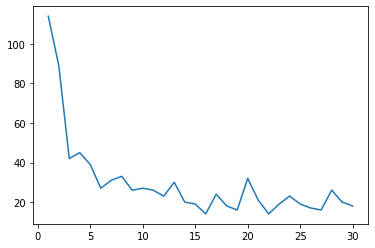

In [18]:
data['title'].value_counts().value_counts().sort_index()[:30].plot()

Llavors podem crear un índex amb els títols amb més de 250 avaluacions.

In [19]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

L'índex de títols que reben al menys 250 puntuacions es pot fer servir per seleccionar les files de ``mean_ratings``: 

In [20]:
mean_ratings = mean_ratings.loc[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344


Per veure els films més valorats per les dones, podem ordenar per la columna F de forma descendent:

In [21]:
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


Suposem ara que volem les pel·licules que estan valorades de forma més diferent entre homes i dones. Una forma d'obtenir-ho és afegir una columna a ``mean_ratings`` que contingui la diferència en mitjana i llavors ordenar:

In [22]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

Ordenant per ``diff`` ens dóna les pel·licules ben valorades per les dones que presenten més diferència entre homes i dones:

In [23]:
sorted_by_diff = mean_ratings.sort_values(by='diff')
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


Invertint l'ordre de les files i fent un ``slicing`` de les 15 files superiors obtenim les pel·licules ben valorades pels homes que no han agradat a les dones: 

In [24]:
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


Si volguéssim les pel·licules que han generat puntuacions més discordants, independentment del gènere, podem fer servir la variança o la desviació estàndard de les puntuacions: 

In [25]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### Important: Temes de rendiment

In [26]:
%timeit data['title'] 
%timeit data.title 
%timeit data[['title']]

1.74 µs ± 68.2 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
4.36 µs ± 286 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
12.2 ms ± 793 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [27]:
type(data[['title']])

pandas.core.frame.DataFrame

In [28]:
type(data.title)

pandas.core.series.Series

## 3. EXERCICIS

### 3.1. PRIMER EXERCICI 

Donada la taula ``data``, calcula la puntuació mitjana de cada usuari. 

In [29]:
import pandas as pd

data_folder = 'ml-1m'

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_table(f'{data_folder}/users.dat', sep='::', header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table(f'{data_folder}/ratings.dat', sep='::', header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table(f'{data_folder}/movies.dat', sep='::', header=None, names=mnames, engine='python',encoding='latin-1')

data = pd.merge(pd.merge(ratings, users), movies)

# Agrupem per id d'usuari i fem la mitjana dels ratings de cada un
data.groupby('user_id')['rating'].mean()

user_id
1       4.188679
2       3.713178
3       3.901961
4       4.190476
5       3.146465
          ...   
6036    3.302928
6037    3.717822
6038    3.800000
6039    3.878049
6040    3.577713
Name: rating, Length: 6040, dtype: float64

+ Quina és la pel·lícula més ben puntuada (en mitja) pels usuaris? (Guarda aquest valor en una variable ``string``). 

In [30]:
'''
Els títols, igual que els id's, són únics. Per tant treballarem directament amb el títol.

Hi ha bastantes pel·lícules que tenen una mitjana de 5 però tenen poques valoracions. 
Enlloc de maximitzar la mitjana maximitzarem una nota ponderada, on farem tendir lleugerament
totes les notes a la mitjana global en un factor inversament proporcional al nº de ratings.

Si tenen un nº ratings << minimum, nota ponderada aprox. mitjana global
Si tenen un nº ratings = minimum, nota ponderada és la mitjana entre la mitjana peli i mitjana global
Si tenen un nº ratings >> minimum, nota ponderada aprox. mitjana peli
'''

global_mean = data['rating'].mean()
minimum = 50

movie_ratings = data.groupby('title').agg(average_rating=('rating', 'mean'), count=('rating', 'count'))
movie_ratings['weighted_rating'] = (movie_ratings['average_rating'] * movie_ratings['count'] + global_mean * minimum) \
    / (movie_ratings['count'] + minimum)

best_movie = movie_ratings.sort_values('weighted_rating', ascending=False).index[0]
best_movie # is this signed?? what about thiss??? and now?ssss

'Shawshank Redemption, The (1994)'

### 3.2. SEGON EXERCICI

Defineix una funció anomenada ``top_movie`` que donat un usuari ens retorni quina és la pel·lícula millor puntuada.<br> 


In [31]:
# Suposem que l'usuari ha valorat alguna pel·lícula
def top_movie(dataFrame, usr):
    """
    Utilitzem índexs booleans per a la id d'usuari per obtenir (en particular)
    tots els ratings d'aquest usuari, els ordenem de forma descendent i retornem
    el primer element usant 'iloc'. Retornar el títol és el més adequat,
    per tant, farem ús del seu índex.
    """
    return dataFrame[dataFrame['user_id']==usr].sort_values(by='rating', ascending=False).iloc[0]['title']

print(top_movie(data, 1))

One Flew Over the Cuckoo's Nest (1975)


### 3.3. TERCER EXERCICI

Construeix una funció que donat un dataframe et retorni el valor que cada usuari li ha donat a una peli. Això ho farem creant un dataframe on les columnes són els `movie_id`, les files `user_id` i els valors siguin el rating donat.

In [32]:
# Posarem 0 = no valorat, ja que els ratings van de 1 a 5
# Seria millor pels següents mètodes si fos un array de numpy
def build_counts_table(df):
    """
    Utilitzarem una pivot table com se'ns mostra al tutorial posant els valors,
    índexs i columnes segons ens demana l'enunciat. A més, canviarem els NaN per
    0 i definirem el tipus dels ratings com a 'int', ja que per defecte són string. (m'he columpiat?)
    """
    return df.pivot_table(values='rating', index='user_id', columns='movie_id').fillna(0).astype('int')

In [33]:
df_counts = build_counts_table(data)
df_counts

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,0,0,2,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


També programarem una funció que donada la taula anterior i dos id's (usuari i peli), extregui el valor donat:

In [34]:
def get_count(df, user_id, movie_id):
    """
    Retorna el nombre de vegades que un usuari ha comprat en un `movie_id`
    
    :param df: DataFrame retornat per `build_counts_table`
    :param user_id: ID de l'usuari
    :param movie_id: ID de la peli
    :return: Enter amb el nombre de vegades que ha comprat
    """
    
    return df.loc[user_id, movie_id]

# No hi ha usuari_id=0 ni movie_id=0, utilitzem el 1
get_count(df_counts, 1, 1)

5

### 3.4. QUART EXERCICI

In [35]:
data.nunique()

user_id         6040
movie_id        3706
rating             5
timestamp     458455
gender             2
age                7
occupation        21
zip             3439
title           3706
genres           301
dtype: int64

Si observem el nombre total d'usuaris unics i de pelicules úniques, podem observar que els id's dels usuaris van de 1 a 6040. Normalment hauriem d'intentar que comencessin al nombre 0, anant de 0 a 6039. 

**Què passa amb els indexos de les pelis??**

> ANSWER Podem observar que també comencen per 1, però a més, en aquest cas específic arriba a 3952. Això és degut al fet que falten ids en el dataframe, és a dir, no totes les ids són nombres consecutius. L'ideal seria que anessin de 0 a 3705

Usant la funció **pd.Categorical(*).codes**, re-indexa els id's dels usuaris i de les pelis perquè vagin de 0 a 6039 i de 0 a 3705 respectivament:

In [36]:
data['user_id'] = pd.Categorical(data['user_id']).codes
data['movie_id'] = pd.Categorical(data['movie_id']).codes

Per comprovar que tot sigui correcte i guardar correctament la taula **df_counts**, torna a calcular-la:

In [37]:
df_counts = build_counts_table(data)
df_counts

movie_id,0,1,2,3,4,5,6,7,8,9,...,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705
user_id,,,,,,,,,,,,,,,,,,,,,
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,0,0,0,2,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 3.5. CINQUÉ EXERCICI



Construeix una funció <b>distEuclid(x,y)</b> que implementi la distància Euclidiana entre dos vectors usant funcions de pandas. Escriu la funció que calculin la semblança entre dos usuaris segons aquesta estructura:

``def SimEuclid (DataFrame, User1, User2)``
    Calcular els **embeddings** de cada usuari, C1 i C2, amb les puntuacions dels ítems comuns que han puntuat el dos usuaris.
    Si no hi ha puntuacions en comú, retornar 0. Retornar ``1/(1+distEuclid(C1, C2))``

\
Avalueu amb la funció ``%timeit`` quant triguen aquests càlculs per un parell d'usuaris.   

> *Nota: Alguns d'aquests exercicis tenen temps de càlcul de l'ordre de minuts sobre tota la base de dades. Per desenvolupar els algorismes és recomanable treballar amb una versió reduïda de la base de dades.* 

> *Nota: **embedding** fa referencia a un vector de N dimensions que té com a funció representar (en aquest cas) els gustos dels usuaris. També es pot fer un embedding d'items i aleshores representarien el contingut d'aquest o caracteristiques semblants.*

---
#### Mesurament de similituds (petita teoria)

El primer pas per poder recomanar és definir una funció de similitud entre vectors. Siguin $x, y$ vectors, implementa la seva distància euclidiana:

* Distància euclidea (inversa): https://en.wikipedia.org/wiki/Euclidean_distance

$$sim(x, y) = \frac{1}{1 + \sqrt{\sum_i(x_i-y_i)^2}}\in [0, 1]$$

---

Per implementar qualsevol d'aquestes únicament es permet l'ús de:

* `np.sum`
* `np.sqrt`
* `np.power`
* `np.dot`
* `np.linalg.norm`
* `np.mean`

I s'ha de fer **sense bucles**.


In [38]:
import math
import numpy as np
import pandas as pd

def distEuclid(x, y):
    """
    Retorna la distancia euclidiana de dos vectors n-dimensionals.
    
    :param x: Primer vector
    :param y: Segon vector
    :return : Escalar (float) corresponent a la distancia euclidiana
    """
    return np.sqrt(np.sum(np.power(x - y, 2)))

def SimEuclid(df_counts, User1, User2):
    """
    Retorna un score que representa la similitud entre user1 i user2 basada en la distancia euclidiana
    
    :param DataFrame: dataframe que conté totes les dades
    :param User1: id user1
    :param User2: id user2
    :return : Escalar (float) corresponent al score
    """
    ratings = df_counts.values
    both_rated_bool = ratings[User1].astype('bool') & ratings[User2].astype('bool')

    return 1 / (1 + distEuclid(ratings[User1, both_rated_bool], ratings[User2, both_rated_bool]))

In [39]:
# Execute functions
SimEuclid(df_counts, 1, 5)

0.179128784747792

### 3.6. SISÉ EXERCICI

Desenvolupa un sistema de recomanació col·laboratiu **basat en usuaris**. 

La funció principal, ``getRecommendationsUser``, ha de tenir com a entrada una taula de puntuacions, un ``user_id``, el tipus de mesura de semblança (Euclidiana) que volem usar, el nombre `m` d'usuaris semblants que volem per fer la recomanació i el nombre ``n`` de recomanacions que volem. Com a sortida ha de donar la llista de les ``n`` millors pel·lícules que li podriem recomanar segons la seva semblança amb altres usuaris.

> *Nota 1: S'ha d'evitar comparar ``user_id`` a ell mateix.*

> *Nota 2: Recordeu que en Python podem passar funcions com a paràmetres d'una funció.*

In [40]:
# getRecommendationsUser(data, 2, 50, 10, SimEuclid)

#### - SECCIÓ 1: 

Computa la score de similitud del usuari desitjat (userID) respecte tots els altres i retorna una llista dels **m** usuaris més propers, que seran els que usarem per fer la recomanació. Normalitzeu els scores de sortida.

In [41]:
def find_similar_users(df_counts, userID, m, simfunction):
    """
    Retorna un diccionari de usuaris similars amb les scores corresponents.
    
    :param DataFrame: dataframe que conté totes les dades
    :param userID: usuari respecte al qual fem la recomanació
    :param m: nombre d'usuaris que volem per fer la recomanació
    :param similarity: mesura de similitud
    :return : diccionary
    """
    simils = [(user, simfunction(df_counts, userID, user)) for user in range(df_counts.shape[0]) if user != userID]
    simils.sort(key=lambda x: -x[1])

    max_simil = simils[0][1]

    top_m = dict(simils[:m])

    for key in top_m:
        top_m[key] /= max_simil
    
    return top_m

In [42]:
import datetime
t = datetime.datetime.now()
sim_dict = find_similar_users(df_counts, 2, 10, SimEuclid)
t = datetime.datetime.now()-t
print(str(t))

0:00:00.844341


In [43]:
sim_dict

{15: 1.0,
 60: 1.0,
 115: 1.0,
 152: 1.0,
 157: 1.0,
 163: 1.0,
 170: 1.0,
 278: 1.0,
 303: 1.0,
 314: 1.0}

**CREIEU QUE ES OPTIM EL TEMPS QUE HA TARDAT PER UN USUARI?** RAONA LA RESPOSTA.

> ANSWER El temps no és òptim... Si assumim que tots els usuaris triguen el mateix trigaríem 2+ hores a calcular una matriu de similituds! A més, haver de calcular
la similitud entre dos usuaris per cada usuari és força ineficient.

Per millorar el problema anteorior, construeix una matriu de mida UXU on cada posició *i,j* indica la distància entre l'element *i* i el *j*. Així doncs, si estàs fent un recomanador basat en usuaris, `matriu[2, 3]` contindrà la similitud entre l'usuari 2 i el 3.

In [72]:
import tqdm

def similarity_matrix(similarity_function, df_counts):
    """
    Retorna una matriu de mida M x M on cada posició 
    indica la similitud entre usuaris (resp. ítems).
    
    :param similarity_function: Funció que calcularà la similitud 
        entre usuaris (resp. ítems)
    :param df_counts: Dataframe que conté el nombre de vegades que 
        un usuari ha comprat en un `aisle_id`
    :return : Matriu numpy de mida M x M amb les similituds.
    """
    if similarity_function == None:
        return similarity_matrix_fast(df_counts)

    num_users, num_movies = df_counts.shape

    sim_matrix_superior = np.zeros((num_users, num_users))
    
    for user1 in tqdm.trange(num_users):
        # Fem un slice del DataFrame amb només les pel·lícules que ha valorat l'usuari1, ja que
        # la resta de pel·lícules no importen i així baixa d'unes 2 hores a menys de 20 minuts.
        # Si tinguéssim però una similaritat on importessin les pel·lícules només vistes per un
        # hauríem de tenir-ho en compte però
        sub_df_counts = df_counts[np.where(df_counts.loc[user1] != 0)[0]]
        for user2 in range(user1+1, num_users):
            sim_matrix_superior[user1, user2] = similarity_function(sub_df_counts, user1, user2)

    return sim_matrix_superior + sim_matrix_superior.T + np.identity(num_users)
    

'''
La versió que ens ha funcionat més ràpid és fer un bucle sobre nº usuaris
i calcular en cada iteració similitud de usuari_i a tota la resta d'usuaris.

A més hem afegit una "millora": quan calculem les similituds d'un usuari a
la resta, només ens cal fer servir la matrius de ratings de les pel·lícules
que l'usuari ha valorat. Això redueix el temps d'execució de 25 min a
1 min 20 seg. A més, computem només el triangle superior, ja que és simètrica.
Això redueix el temps per la meitat a uns 40 segons.

Si intentem borrar aquest bucle usant arrays 3D, en primer lloc ens trobem
que neccessitaríem 126GB de memòria RAM. Si decidim fer particions de
pel·lícules solucionem el problema de la RAM, però el codi va a la mateixa
velocitat que el cas 2D sense la "millora".

Si decidim iterar per pel·lícules enlloc d'usuaris a priori podria semblar
que seria més ràpid, ja que nº pel·lícules < nº d'usuaris. A més, podríem
aplicar una millora similar i restringir-nos només als usuaris que han valorat
aquella pel·lícula, i hi ha pel·lícules que tenen menys de 5 valoracions
(en canvi tots els usuaris tenen >= 20 ratings). Tanmateix, programant-ho
ens ha sortit que és igual de ràpid que la versió que itera sobre el nº d'usuaris.
'''
def similarity_matrix_fast(df_counts):
    ratings = df_counts.values
    num_users, num_moves = ratings.shape
    sim_matrix = np.zeros((num_users, num_users))
    count_matrix = np.zeros_like(sim_matrix, dtype='int')
    
    for i in tqdm.trange(num_users):
        sub_ratings = ratings[i:, np.where(ratings[i] != 0)[0]]
        sub_both_rated = sub_ratings.astype('bool')
        count_matrix[i][i:] =  sub_both_rated.sum(axis=1)
        sim_matrix[i][i:] = 1 / (1 + np.sqrt(np.square(sub_ratings - sub_ratings[0]).sum(axis=1, where=sub_both_rated)))
    
    # If 2 users haven't rated any common movie, similarity is 0
    # We probably should ponderate the similarity by the nº of common items instead of a simple if 0 common then 0,
    # because if 2 users only have 1 common rating and the same mark, the similarity is 1!!!!
    # return sim_matrix * count_matrix / count_matrix.max()
    # Cada 10 valoracions es redueix a la meitat 1 - similitud
    superior_triangle = sim_matrix * (1 - 1 / np.exp2(count_matrix / 10))
    #superior_triangle = sim_matrix * count_matrix.astype('bool')
    return superior_triangle + superior_triangle.T - np.identity(num_users)

Per cridar aquesta funció, el primer paràmetre pot ser:

* Amb la funció de la distancia euclidiana que heu programat abans pot trigar ~@1h 30min treballant directament amb valors de numpy, ~@20h a partir de pandas pur.
* Opcionalment (no és obligatori fer-ho) podeu programar una funció que treballi específicament amb matrius (i no vectors). Si ho feu, cal gestionar-ho quan es rep `None`.  (@5s)

In [72]:
# Amb el doble bucle i la funció de similaritat, treballany amb numpy, veiem que tardaria unes 2 hores
sim = similarity_matrix(SimEuclid, df_counts)

  1%|▏         | 79/6040 [00:12<16:18,  6.09it/s]


KeyboardInterrupt: 

In [73]:
# En canvi treballant amb matrius i en un únic bucle tarda uns 30 segons només
sim = similarity_matrix(None, df_counts)

100%|██████████| 6040/6040 [00:36<00:00, 165.64it/s] 


In [84]:
Counter((sim*100).astype('int').flatten()).most_common()

[(9, 4231110),
 (8, 4055526),
 (10, 3903934),
 (6, 3778376),
 (7, 3565120),
 (11, 2903974),
 (12, 2644738),
 (5, 2241986),
 (4, 1631652),
 (3, 1580376),
 (0, 1530540),
 (13, 1314960),
 (14, 994122),
 (2, 624224),
 (15, 507782),
 (16, 270246),
 (1, 210482),
 (18, 167446),
 (17, 162716),
 (19, 53542),
 (24, 33184),
 (20, 21182),
 (21, 13106),
 (29, 12184),
 (22, 5924),
 (23, 5592),
 (34, 4574),
 (99, 3109),
 (25, 1890),
 (38, 1820),
 (26, 1046),
 (42, 780),
 (28, 420),
 (100, 327),
 (46, 308),
 (98, 281),
 (50, 226),
 (97, 196),
 (53, 163),
 (27, 130),
 (96, 123),
 (94, 116),
 (31, 116),
 (56, 113),
 (92, 106),
 (59, 97),
 (62, 97),
 (95, 95),
 (91, 86),
 (89, 83),
 (64, 81),
 (93, 79),
 (73, 72),
 (83, 71),
 (67, 70),
 (69, 68),
 (79, 62),
 (71, 60),
 (82, 58),
 (32, 58),
 (75, 58),
 (84, 55),
 (78, 55),
 (76, 51),
 (86, 49),
 (85, 49),
 (88, 48),
 (87, 48),
 (81, 44),
 (90, 40),
 (33, 34),
 (30, 34),
 (35, 14),
 (37, 8),
 (39, 6),
 (36, 2)]

In [78]:
count

array([[1.        , 0.33333333, 0.23166248, ..., 0.        , 0.2052131 ,
        0.19074357],
       [0.33333333, 1.        , 0.2052131 , ..., 0.30901699, 0.30901699,
        0.09733669],
       [0.23166248, 0.2052131 , 1.        , ..., 0.5       , 0.21712927,
        0.12389934],
       ...,
       [0.        , 0.30901699, 0.5       , ..., 1.        , 0.30901699,
        0.13802626],
       [0.2052131 , 0.30901699, 0.21712927, ..., 0.30901699, 1.        ,
        0.1310058 ],
       [0.19074357, 0.09733669, 0.12389934, ..., 0.13802626, 0.1310058 ,
        1.        ]])

In [50]:
# En canvi treballant amb matrius i en un únic bucle tarda menys de 30 segons
count = similarity_matrix(None, df_counts)

100%|██████████| 6040/6040 [00:24<00:00, 242.40it/s] 


Ara torna a re-fer la funció **find_similar_users** i mira quant triga... 

> Recorda que les scores han d'estar normalitzades!

In [50]:
def find_similar_users(df_counts, sim_mx, userID, m):

    simils = [(i, sim_mx[userID][i]) for i in range(len(sim_mx[userID])) if i != userID]
    simils.sort(key=lambda x: -x[1])

    max_simil = simils[0][1]

    top_m = dict(simils[:m])

    for key in top_m:
        top_m[key] /= max_simil

    return top_m

In [51]:
t = datetime.datetime.now()
sim_dict = find_similar_users(df_counts, sim, 2, 10)
t = datetime.datetime.now()-t
print(str(t))
print(sim_dict)

0:00:00.008998
{15: 1.0, 115: 1.0, 152: 1.0, 278: 1.0, 314: 1.0, 363: 1.0, 442: 1.0, 446: 1.0, 579: 1.0, 631: 1.0}


**Hauria d'haver baixat més de 30 cops el temps anterior!!**

#### - SECCIÓ 2: 
Computa les recomanacions per un usuari amb cadascun dels m usuaris més propers i fes una funció que retorni la **weighted average list** d'aquests per tal d'obtenir la recomanació final. Feu servir la funció anterior que usava la matriu de similituds per anar més ràpid!!


> *Nota: la **weighted average list** es calcularà agregant els n items més puntuats de cadascun dels m users més semblants al usuari donat.

In [235]:
def getRecommendationsUser(df_counts, user, sim_mx, n, m):
    """
    Retorna un dataframe de pel·licules amb els scores.
    
    :param DataFrame: dataframe que conté totes les dades
    :param user: usuari al qual fem la recomanació
    :param sim_mx: similarity_function
    :param n: nombre de pelis a recomanar
    :param m: nombre d'usuaris semblants a tenir en compte per les recomanacions
    :return : pandas de pelis amb els seus scores predits
    """
    ratings = df_counts.values

    similar_users = find_similar_users(df_counts, sim_mx, user, m)
    weighted_avg_list = []

    for movie in range(ratings.shape[1]):

        if ratings[user, movie] > 0:
            continue

        # Suma del producte de les valoracions amb les similaritats
        total = np.sum(ratings[list(similar_users), movie] * list(similar_users.values()))
        # Utilitzarem una array de booleans per aplicar a la suma només les similaritats dels usuaris que han vist la pel·lícula de la iteració
        similarity_sum = np.sum(np.array(list(similar_users.values())) * ratings[list(similar_users), movie].astype('bool'))

        num_scored = ratings[list(similar_users), movie].astype('bool').sum()
        # Per no obtenir recomanacions poc útils, només considerem les pel·lícules que almenys han valorat
        # 5 usuaris dels més similars, ja que les pel·lícules amb poques valoracions tenen una nota poc fiable
        #if num_scored >= 5:
        factor = np.log(num_scored)
        weighted_avg_list.append((movie, (factor * total / similarity_sum if similarity_sum > 0 else 0)))

    weighted_avg_list.sort(key=lambda x: -x[1])
    top_n = dict(weighted_avg_list[:n])

    recommendation_table = pd.DataFrame(top_n.items(), columns=['movie_id', 'estimated_rating'])

    return recommendation_table

In [236]:
getRecommendationsUser(df_counts_train, 0, sim_nou, df_counts_train.shape[1], 50)

,movie_id,estimated_rating
0,15,5.0
1,46,5.0
2,66,5.0
3,119,5.0
4,135,5.0
...,...,...
3648,3701,0.0
3649,3702,0.0
3650,3703,0.0
3651,3704,0.0


In [55]:
t = datetime.datetime.now()
user_prediction = getRecommendationsUser(df_counts, 3, sim, 10, 50)
t = datetime.datetime.now()-t
print(str(t))

0:00:00.292994


In [56]:
user_prediction

,movie_id,estimated_rating
0,1066,5.000000
1,1186,5.000000
2,49,4.800000
3,852,4.800000
4,1167,4.800000
5,802,4.700000
6,309,4.692308
7,1104,4.666667
8,1453,4.600000
9,513,4.588235


#### - SECCIÓ 3

Comprovem que realment l'usuari 3 no tenia recomanació per les pelis a les que estem recomanant:

In [64]:
data_user3 = data[data['user_id']==3]
data_user3.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
28884,3,1025,4,978293964,M,45,7,02460,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
45686,3,2488,5,978294230,M,45,7,02460,Run Lola Run (Lola rennt) (1998),Action|Crime|Romance
46759,3,253,5,978294199,M,45,7,02460,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi
52257,3,1848,5,978294230,M,45,7,02460,Saving Private Ryan (1998),Action|Drama|War
70281,3,3235,5,978294008,M,45,7,02460,"Hustler, The (1961)",Drama


In [65]:
desired_movie_id_to_check = 0
best_film_to_predict = user_prediction['movie_id'].iloc[desired_movie_id_to_check]
print(best_film_to_predict)

1066


In [59]:
data_user3[data_user3['movie_id']==best_film_to_predict]

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres


**Com es que ara estem predint un rating per la pelicula "best_film_to_predict"?** Digues quin nombre és la predicció

**El nombre de la millor pel·lícula a predir és 1066 (tot i que per la pel·lícula 1186 també dona nota màxima, un 5). Tot i que l'usuari no ha vist la pel·lícula, utilitzant una matriu de similaritats i
fent una ponderació amb les notes dels usuaris més similars (usant les similaritats com a pes), obtenim una aproximació de les notes que donaria l'usuari a les pel·lícules que no ha vist. 
La normalització la realitzem utilitzant la suma de les similaritats dels usuaris que han vist la peli.**

### 3.7. SETÈ EXERCICI


A continuació usarem la metrica Mean Absolute Error (MAE) per evaluar el nostre sistema. Aquesta mètrica ens permetrà mesurar la diferencia entre dues llistes donat un usuari: 

**1.** La llista amb els ratings originals d'un usuari donat

**2.** La llista de les prediccions generades per aquest usuari

#### - SECCIÓ 1: 

Treu el 10% dels usuaris i reserva aquests en una variable anomenada **test_set** i la resta en una variable anomenada **train_set**.

In [60]:
import random

unique_users = data['user_id'].unique()
n_test_users = int(len(unique_users) * 0.1)
n_train_users = len(unique_users) - n_test_users

test_usrs = random.sample(list(unique_users), n_test_users)

In [61]:
n_test_users, n_train_users

(604, 5436)

In [62]:
test_set = data[data['user_id'].isin(test_usrs)]
train_set = data[~data['user_id'].isin(test_usrs)]
assert len(test_set) + len(train_set) == len(data)

Què passarà si calculo la matriu de similitud amb **train_set** i després intento predir pels usuaris de **test_set**??

**No es podria realitzar el càlcul. Al utilitzar el train_set per calcular la matriu de simil·litud només trindriem als usuaris
del train set, és a dir, no tindriem les similituds dels usuaris del test_set. Si en comptes de fer simil·litud entre usuaris
féssim similitud entre pel·lícules això es podria fer.**

#### - SECCIÓ 2:

Selecciona aproximadament el 80% de les interaccions de cada usuari de test i junta-les al **train_set**. Ara podem evaluar el sistema?

In [66]:
test_set.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
1,1,1104,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
8,27,1104,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
18,57,1104,5,977933866,M,25,2,30303,One Flew Over the Cuckoo's Nest (1975),Drama
20,61,1104,4,977968584,F,35,3,98105,One Flew Over the Cuckoo's Nest (1975),Drama
36,138,1104,4,977359402,F,25,20,45409,One Flew Over the Cuckoo's Nest (1975),Drama


Seleccionem la posició 1 i aquest use_id serà el que usarem pel codi d'exemple (que després haureu de replicar).

In [70]:
def add_testdata(traindf, test_set):
    """
    Retorna els N usuaris més similars basat en la correlació de Pearson
    
    :param traindf: dataframe que conté les dades de train
    :param test_set: dataframe que conté les dades de test

    :return : 
        - :param 1st: dataframe que conté les dades de train juntament amb el 80% de test seleccionat
        - :param 2nd: dataframe que conté les dades de test que queden (20% restant)
    """
    # la vostra solució aquí
    train_appended = test_set.groupby('user_id').sample(frac=0.8)
    test_appended = test_set[~test_set.index.isin(train_appended.index)]
    
    return pd.concat((traindf, train_appended)), test_appended

In [71]:
train_set.shape

(902952, 10)

In [72]:
test_set.shape

(97257, 10)

In [74]:
train, test = add_testdata(train_set, test_set)

In [75]:
train.shape

(980760, 10)

In [76]:
test.shape

(19449, 10)

#### -SECCIÓ 3:

Fes una funció usant **np.abs** que serveixi per evaluar el nostre sistema. **(PISTA:)** La funció ha de mesurar la diferencia en mitjana de la llista de ratings originals amb la llista de ratings predida.

In [206]:
# Com en els exercicis anteriors, utilitzem df_counts enlloc del DataFrame
def evaluateRecommendations(df_counts_train, df_counts_test, m, n, sim):
    """
    Retorna l'error generat pel model
    
    :param DataFrame: dataframe que conté totes les dades
    :param userID: usuari respecte al qual fem la recomanació
    :param m: nombre d'usuaris que volem per fer la recomanació
    :param n: nombre de pelis a retornar
    :param sim: matriu de similitud
    :return : Escalar (float) corresponent al MAE
    """

    differences = []
    for user in tqdm.tqdm(df_counts_test.index):
        user_predictions = getRecommendationsUser(df_counts_train, user, sim, df_counts_train.shape[1], m)
        for row in user_predictions.itertuples():
            if row.movie_id in df_counts_test.columns and df_counts_test.loc[user, row.movie_id] > 0:
                differences.append(row.estimated_rating - df_counts_test.loc[user, row.movie_id])
    print(len(differences))
    return np.mean(np.abs(differences))

In [215]:
getRecommendationsUser(df_counts_train, 0, sim_nou, df_counts_train.shape[1], 50)

,movie_id,estimated_rating
0,15,5.0
1,46,5.0
2,66,5.0
3,119,5.0
4,135,5.0
...,...,...
3648,3701,0.0
3649,3702,0.0
3650,3703,0.0
3651,3704,0.0


In [124]:
[col for col in range(df_counts_train.columns[-1]+1) if col not in df_counts_train]

[122, 1652, 3089, 3152, 3480]

In [207]:
# Transformem en una rating table per a ser consistents amb la resta de mètodes
df_counts_train = build_counts_table(train)

# Posem les columnes on faltin películes a 0 (hi ha possibilitat de perdre columnes si hi
# ha pel·lículesque només han vist els pocs usuaris que son al test set i no al train set)
for col in range(df_counts_train.columns[-1]+1):
    if col not in df_counts_train:
        df_counts_train[col] = 0
df_counts_test = build_counts_table(test)
sim_nou = similarity_matrix(None, df_counts_train)

100%|██████████| 6040/6040 [01:07<00:00, 89.65it/s]  


In [211]:
df_counts_test.values.astype('bool').sum()

19449

In [208]:
t = datetime.datetime.now()
mae = evaluateRecommendations(df_counts_train, df_counts_test, 50, 10, sim_nou)
t = datetime.datetime.now() - t
print(str(t))

100%|██████████| 604/604 [02:58<00:00,  3.38it/s]

464
0:02:58.739818


In [213]:
t = datetime.datetime.now()
mae = evaluateRecommendations(df_counts_train, df_counts_test, 50, 10, sim_nou)
t = datetime.datetime.now() - t
print(str(t))

 15%|█▌        | 93/604 [00:34<03:21,  2.53it/s]

In [214]:
mae

2.880095287673744

In [203]:
mae

0.9084464164365021

In [109]:
mae

0.6685851286553658

### 3.8. VUITÉ (I ÚTLIM) EXERCICI


**Que surt més a compte, fer un recomanador unic pels dos sexes o un per cada sexe?** Justifica la resposta per escrit i amb el codi necessari.

> RESPOSTA

In [ ]:
# la vostra solució aquí